# Import Libraries

In [1]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for statistics
from scipy import stats
from scipy.stats import norm

# Libraries for machine learning preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Library for controlling warnings
import warnings  # Suppress warnings during execution

# Configurations
warnings.filterwarnings('ignore')  # Disable warnings
# Inline plotting in Jupyter notebooks
%matplotlib inline

# Import dataset

In [2]:
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')

train = pd.read_csv("/content/drive/My Drive/EGT307/train.csv") # Read data from directory
test = pd.read_csv("/content/drive/My Drive/EGT307/test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train.head(5) # Read top 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# EDA

In [5]:
# Plots a bar graph of the trend between feature and the survival rate, and the count of each category in the feature

def plot_survival_rates_by_feature(data, column_name, target_column='Survived', palette='Blues', title=None):
    """
    Plots the survival rates and the counts for a given feature side by side and prints the numerical values side by side.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: The feature column name to group by (e.g., 'Sex', 'Pclass').
    - target_column: The target column (default is 'Survived').
    - palette: Color palette for the plot (default is 'Blues').
    - title: Title of the plot. If not provided, a default title is generated.
    """

    # Calculate the mean survival rate for each group
    survival_rates = data.groupby(column_name)[target_column].mean().reset_index()
    # Calculate the count of each category
    count_data = data[column_name].value_counts().reset_index()
    count_data.columns = [column_name, 'Count']

    # Merge survival rates and counts on the feature column
    merged_data = pd.merge(survival_rates, count_data, on=column_name)

    # Print the merged DataFrame directly
    print(f"\nSurvival Rates and Counts by {column_name.capitalize()}:")
    print(merged_data.to_string(index=False, float_format="%.5f"))  # Print values

    # Set a default title if none is provided
    if not title:
        title = f'Survival Rates and Counts by {column_name.capitalize()}'

    # Create subplots: One for survival rates and one for counts
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    # Survival Rates Barplot
    sns.barplot(data=survival_rates, x=column_name, y=target_column, palette=palette, ax=ax[0])
    ax[0].set_title(f'Survival Rates by {column_name.capitalize()}', fontsize=16)
    ax[0].set_xlabel(column_name.capitalize(), fontsize=12)
    ax[0].set_ylabel('Survival Rate', fontsize=12)
    ax[0].set_ylim(0, 1)  # Set y-axis limits to show percentage

    # Count Barplot
    sns.barplot(data=count_data, x=column_name, y='Count', palette='Blues', ax=ax[1])
    ax[1].set_title(f'Count of {column_name.capitalize()}', fontsize=16)
    ax[1].set_xlabel(column_name.capitalize(), fontsize=12)
    ax[1].set_ylabel('Count', fontsize=12)


    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()



Survival Rates and Counts by Sex:
   Sex  Survived  Count
female   0.74204    314
  male   0.18891    577


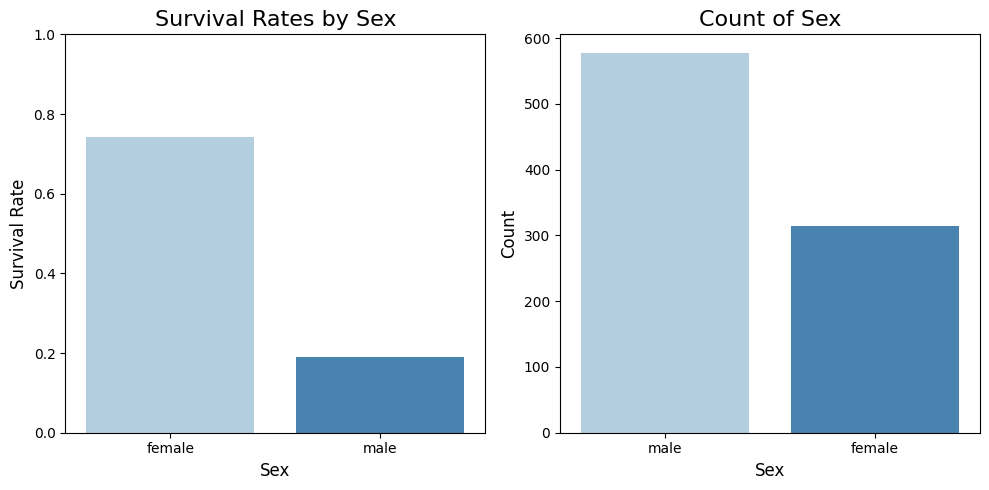

In [6]:
# Plotting the survival rates by Sex
plot_survival_rates_by_feature(train, 'Sex')

The survival rates of females (74.2%) is significantly higher than the survival rates of males (18.8). This could be because the priority were given to females and children to board the lifeboats.

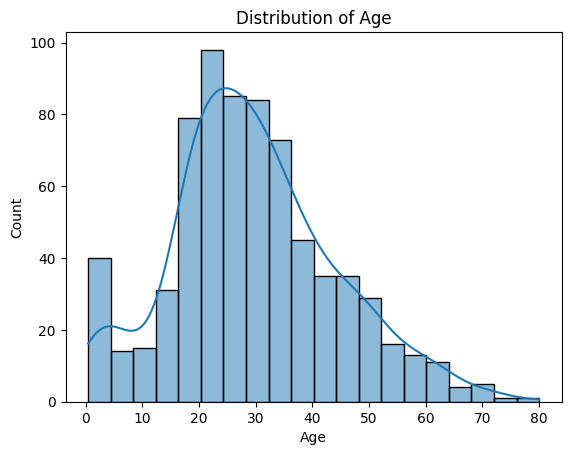

In [7]:
age_untransformed = sns.histplot(train['Age'], kde=True)  # kde=True adds a density line

plt.ylabel('Count')  # Set y-axis label to Count
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

The age ranges from 0 - 80. The median age is around 28 before imputation.

Age bins were created to simplify the the visualisation of the survival rates. It reduces the number of categorical values, making it easier to make trends and insights.


Survival Rates and Counts by Age_bin:
Age_Bin  Survived  Count
    0-4   0.67500     40
   5-12   0.44828     29
  13-18   0.42857     70
  19-30   0.35294    272
  31-45   0.42574    202
  46-60   0.41772     79
  61-80   0.22727     22


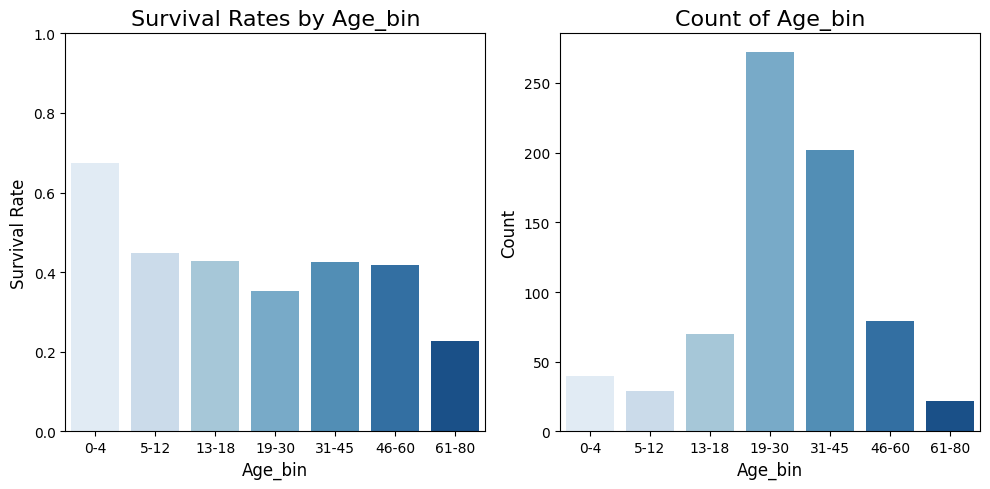

In [8]:
# Create Age Bin Categories
age_bins = [0, 5, 13, 19, 31, 46, 61, 81]  # Define age bins
age_labels = ['0-4', '5-12', '13-18', '19-30', '31-45', '46-60', '61-80']  # Labels for bins

train['Age_Bin'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True) # Create Age_Bin column

# Plotting the survival rates by Age_Bin
plot_survival_rates_by_feature(train, 'Age_Bin')

The highest survival rate is children between the ages of 0-4 (67.5%).
The lowest survival rate is the elderly between the ages of 61-80 (22.7%).
High survival rate among yonng children is likely due to priority to save them during the evacuation.
Old age likely made it more challenging for them to quickly evacuate to the lifeboats.
The age ranges from 4-60 had a similar survival rate despite the large age gap.



Survival Rates and Counts by Fare_bin:
Fare_Bin  Survived  Count
    0-10   0.19940    336
   11-25   0.42081    221
   26-50   0.41954    174
  51-100   0.65421    107
 101-200   0.75758     33
 201-600   0.70000     20


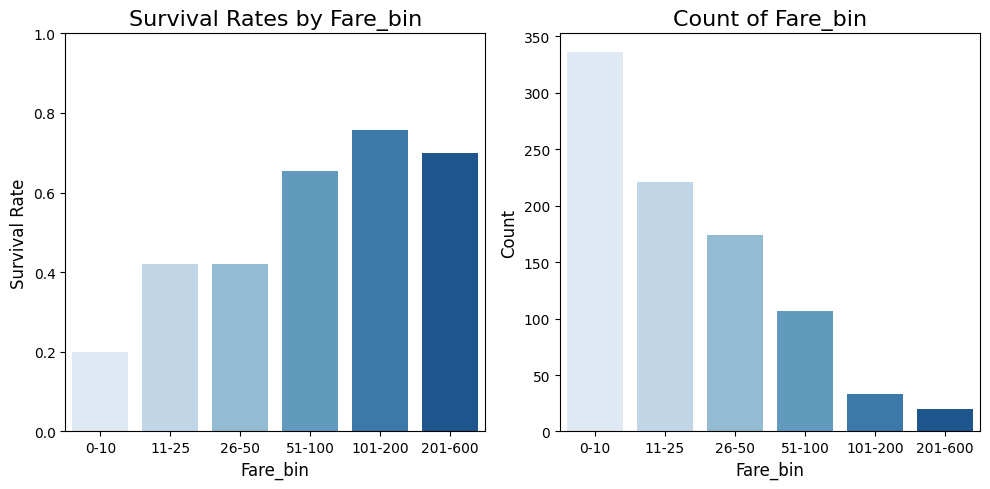

In [9]:
# Create Fare Bin Categories
fare_bins = [-1, 10, 25, 50, 100, 200, 600]  # Define the bins (-1 to include 0)
fare_labels = ['0-10', '11-25', '26-50', '51-100', '101-200', '201-600']  # Accurate labels for bins

# Assign bins to the 'Fare_Bin' column with the updated labels
train['Fare_Bin'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, right=True)

# Plot survival rates by Fare Bin
plot_survival_rates_by_feature(train, 'Fare_Bin')

The fare prices highly correlates to the survival rates of the passengers. The passengers who paid lower fair were less likely to survive while the passengers with higher fare prices were more likely to survive.
The fare group with the lowest survival rate is only 20% while the highest is around 70%. This could be due to the location of the rooms or the difference in treatment received which affected their evacuation.

<Axes: xlabel='Fare'>

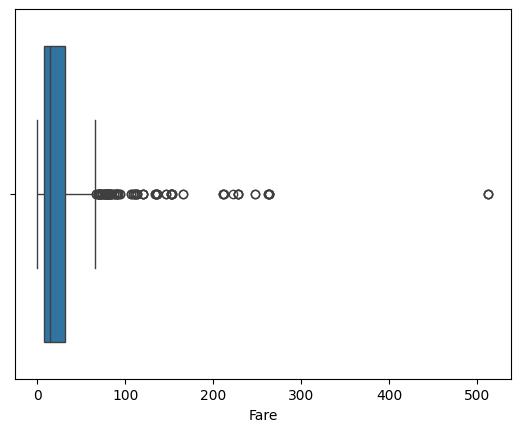

In [10]:
sns.boxplot(x=train['Fare'])

#There is an outlier with a fare price of around 500

In [11]:
train[train['Fare'] > 500] # There are 3 passengers with the same ticket type and price

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Fare_Bin
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,31-45,201-600
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,31-45,201-600
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,31-45,201-600


The outliers were not removed because they were still good sources of data to use for the model


Survival Rates and Counts by Pclass:
 Pclass  Survived  Count
      1   0.62963    216
      2   0.47283    184
      3   0.24236    491


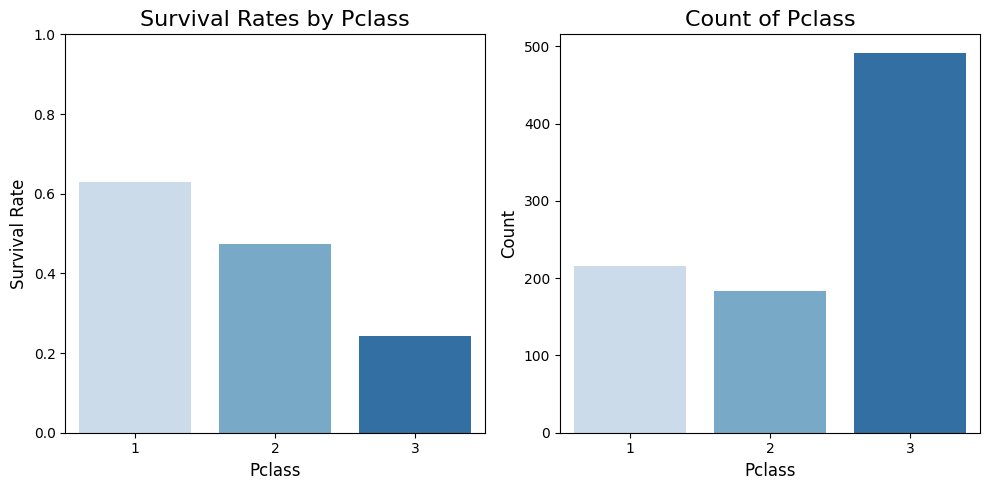

In [12]:
# Plot survival rates by Pclass
plot_survival_rates_by_feature(train, 'Pclass')

Similar to fare bins, passengers in first class had a higher survival rate followed by second and third class.


Survival Rates and Counts by Sibsp:
 SibSp  Survived  Count
     0   0.34539    608
     1   0.53589    209
     2   0.46429     28
     3   0.25000     16
     4   0.16667     18
     5   0.00000      5
     8   0.00000      7


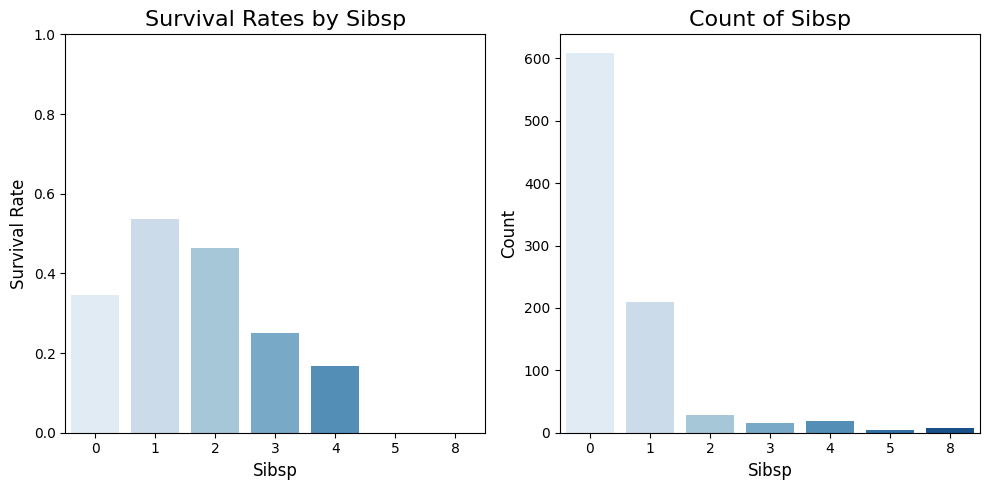

In [13]:
# Plot survival rates by SibSp
plot_survival_rates_by_feature(train, 'SibSp')

There is a general decrease in survival rate as the number of siblings/spouses (SibSp) increases (1-4). But the low counts of SibSp more than 1 decreases the reliability of the survival rates. This indicates that SibSp is not a strong factor in affecting the passengers' survival


Survival Rates and Counts by Parch:
 Parch  Survived  Count
     0   0.34366    678
     1   0.55085    118
     2   0.50000     80
     3   0.60000      5
     4   0.00000      4
     5   0.20000      5
     6   0.00000      1


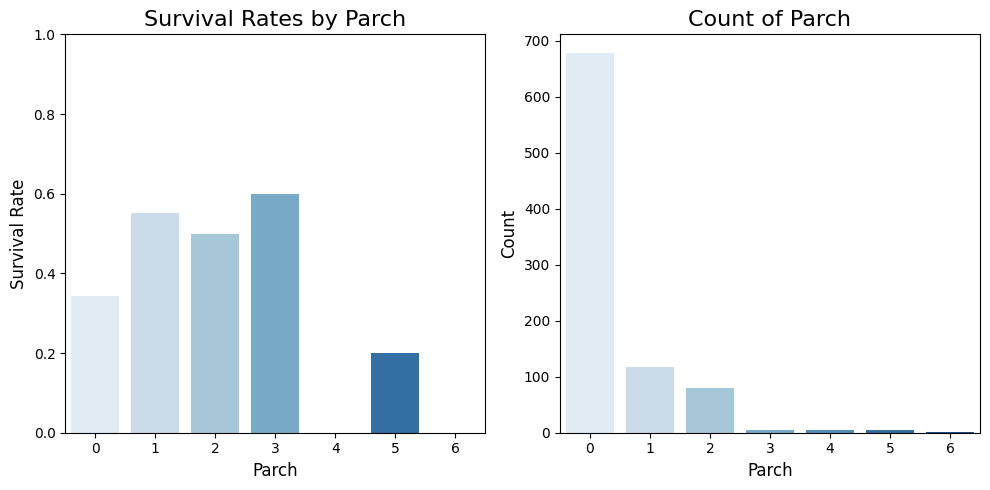

In [14]:
plot_survival_rates_by_feature(train, 'Parch')

There is a small trend where the survival rate increased when the number of parents/children increased from 0 to 3. Similar to SibSp, the low number of passengers with a parch value of 3 or more causes it to be difficult to draw any trends from the bar chart.

The Family_Size column was made to create to have a more comprehensive view on the relationship between the number of family members and the survival rate.


Survival Rates and Counts by Family_size:
 Family_Size  Survived  Count
           1   0.30354    537
           2   0.55280    161
           3   0.57843    102
           4   0.72414     29
           5   0.20000     15
           6   0.13636     22
           7   0.33333     12
           8   0.00000      6
          11   0.00000      7


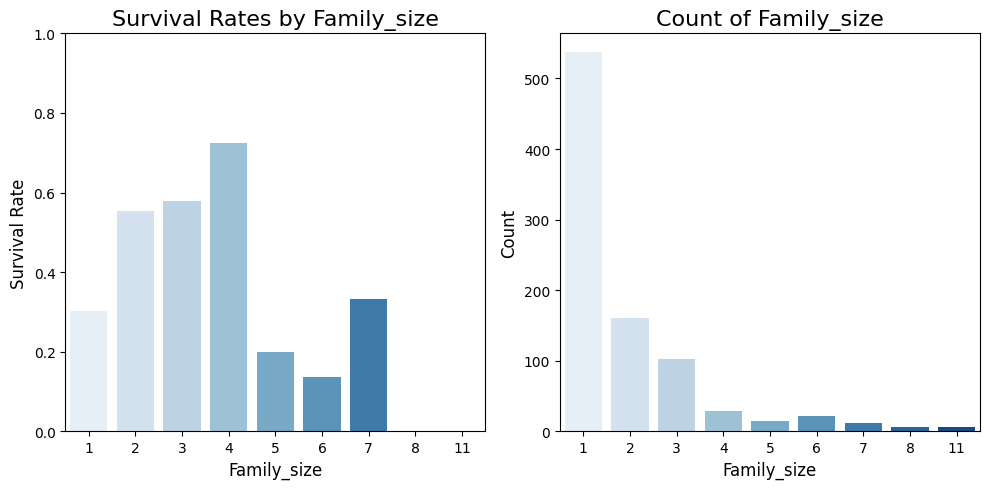

In [15]:
# Create Family_Size column
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1

plot_survival_rates_by_feature(train, 'Family_Size')

Overall, the large majority of the people were alone (537). This could have caused the low survival rate for passenger size of 1. There is a large increase in survival rate from a family size of 1 to 4.



Survival Rates and Counts by Embarked:
Embarked  Survived  Count
       C   0.55357    168
       Q   0.38961     77
       S   0.33696    644


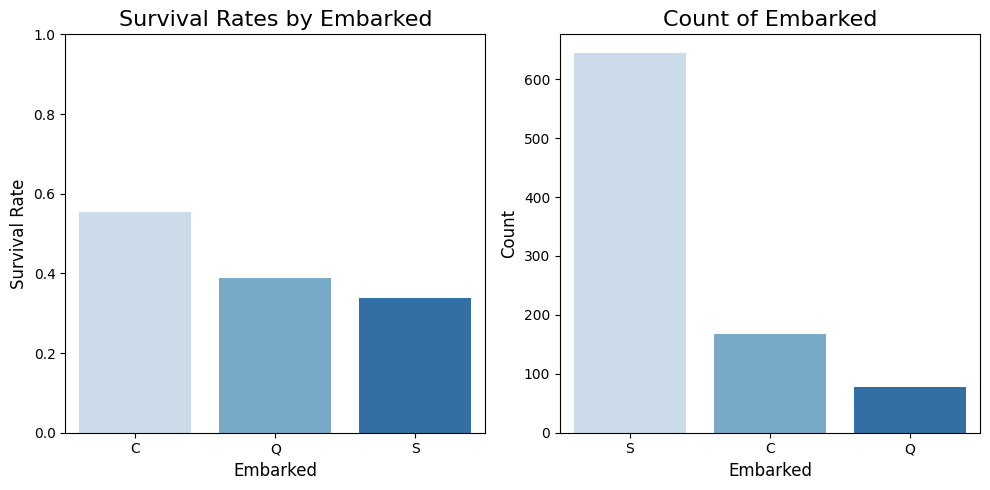

In [16]:
# Plotting the survival rates by Embarked
plot_survival_rates_by_feature(train, 'Embarked', title='Survival Rates by Embarkation Point')

The survival rate of passengers from embarkation point C (55.3%) were significantly higher than point Q (39.0%) and point S (33.7%). This could indicate that the embarkation point is related to the survival rate of the passengers. However, the reason why embarkation point seems to affect the survival rate is unknown.

The deck and cabin number were split in an attempt to discover if the Cabin feature had any relationship with survival rate.

In [17]:
# Extracting deck and cabin number
train['Deck'] = train['Cabin'].str.extract('([A-Z])')  # First letter for deck
train['Cabin_Number'] = train['Cabin'].str.extract('(\d+)')  # Numeric part for cabin number

# Fill missing values with 'Unknown'
train['Deck'] = train['Deck'].fillna('Unknown')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Fare_Bin,Family_Size,Deck,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,19-30,0-10,2,Unknown,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-45,51-100,2,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,19-30,0-10,1,Unknown,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-45,51-100,2,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-45,0-10,1,Unknown,NaN



Survival Rates and Counts by Deck:
   Deck  Survived  Count
      A   0.46667     15
      B   0.74468     47
      C   0.59322     59
      D   0.75758     33
      E   0.75000     32
      F   0.61538     13
      G   0.50000      4
      T   0.00000      1
Unknown   0.29985    687


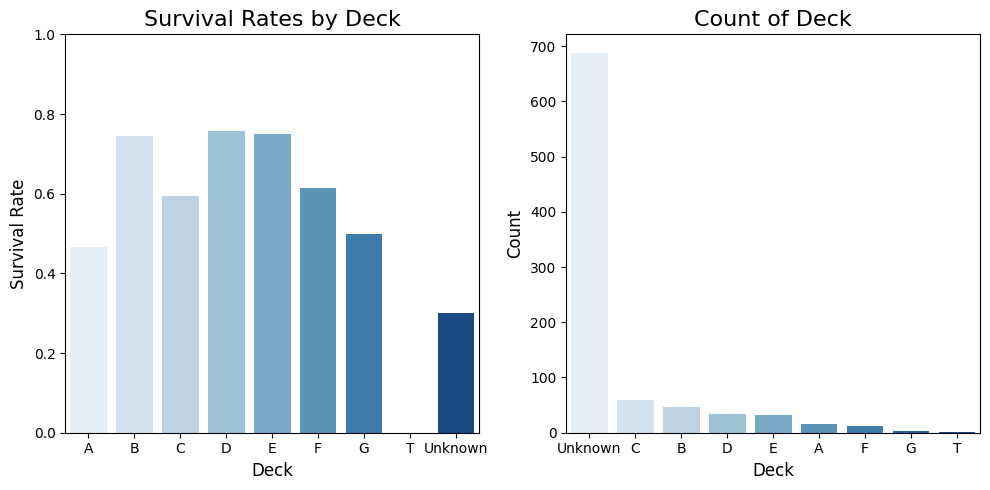

In [18]:
# Plot bar graph
plot_survival_rates_by_feature(train, 'Deck', title='Survival Rates by Cabin Deck')

Most of the decks have a similar survival rate except for unknown which has the lowest out of all the decks. This could be due to the extremely large number of unknown decks. Since most of passengers did not survive, it likely dropped the survival rate of the unknown deck. Deck does not seem to correlate with the survival of the passengers.

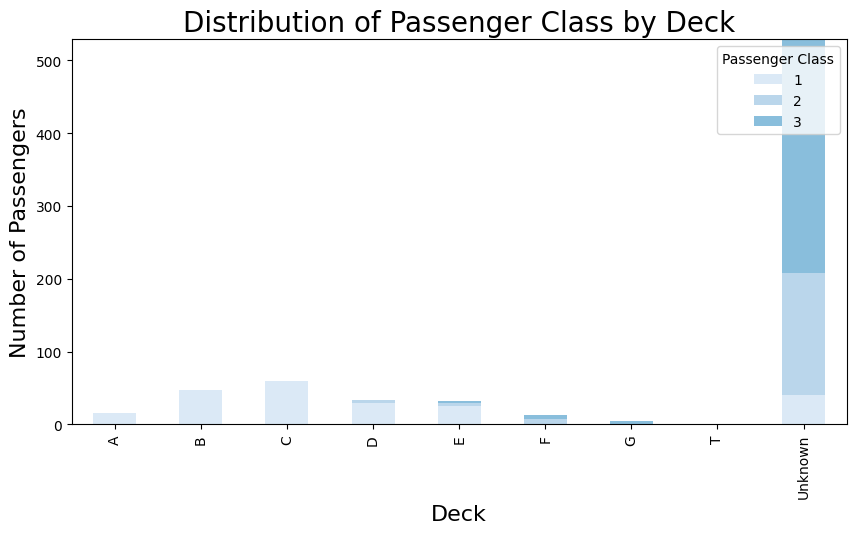

In [19]:
# Create a count of passengers by Deck and Pclass
deck_class_counts = train.groupby(['Deck', 'Pclass']).size().unstack(fill_value=0)

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 5))
deck_class_counts.plot(kind='bar', stacked=True, color=sns.color_palette('Blues'), ax=plt.gca())

plt.title('Distribution of Passenger Class by Deck', fontsize=20)
plt.xlabel('Deck', fontsize=16)
plt.ylabel('Number of Passengers', fontsize=16)
# plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.legend(title='Passenger Class', loc='upper right')
plt.ylim(0, deck_class_counts.values.max() + 50)  # Set y-axis limits
plt.show()

This graph shows that the large majority of third class passengers had no record of their Deck while most of the first class passengers has a deck recorded. The deck might link to which floor they were on the ship when it sank, affecting how far away they were from the life boats. However, the number of null values prevents this feature from helping to predict the survival of the passengers.

# Data Processing

## Imputing age

This section compares the effectiveness of different imputation techniques
1. Median
2. Median by title
3. k-nearest neighbors (KNN)

In [20]:
# Create a copy of the dataframe
train_copy = train.copy()

# Calculate the median age
median_age = train_copy['Age'].median()

# Fill missing values in the 'Age' column with the median age
train_copy['Age'].fillna(median_age, inplace=True)

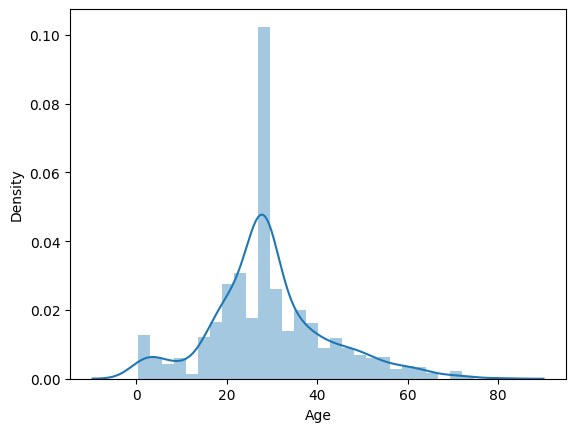

In [21]:
# Plot the distribution of the 'Age' column
dc_age_median = sns.distplot(train_copy['Age']) # Distribution curve (median)

In [22]:
# Extract 'Title' from the 'Name' column
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Fare_Bin,Family_Size,Deck,Cabin_Number,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,19-30,0-10,2,Unknown,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-45,51-100,2,C,85,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,19-30,0-10,1,Unknown,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-45,51-100,2,C,123,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-45,0-10,1,Unknown,NaN,Mr


In [23]:
# Create a second copy of the dataframe
train_copy2 = train.copy()

# Ensure Age is numeric
train_copy2['Age'] = pd.to_numeric(train['Age'], errors='coerce')

# Fill missing ages based on the median age within each 'Title' group using transform
train_copy2['Age'] = train_copy2.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

train_copy2[['Name', 'Title', 'Age']].head() # Verify Changes

,Name,Title,Age
0,"Braund, Mr. Owen Harris",Mr,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,38.0
2,"Heikkinen, Miss. Laina",Miss,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,35.0
4,"Allen, Mr. William Henry",Mr,35.0


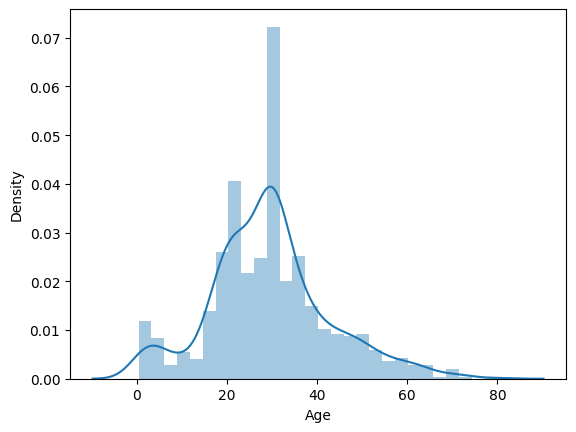

In [24]:
# Plot the distribution of the 'Age' column
dc_age_median_by_title = sns.distplot(train_copy2['Age']) #Distribution curve (median by title)

In [25]:
# Create a temporary DataFrame with relevant features for KNN imputation
knn_data = train[['Age', 'Pclass', 'Fare', 'Sex']].copy()

# Encode 'Sex' as numeric for KNN
knn_data['Sex'] = knn_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(knn_data)

# Update the original Age column in `train` with the imputed values
train['Age'] = knn_imputed[:, 0]  # Select the first column, which corresponds to Age


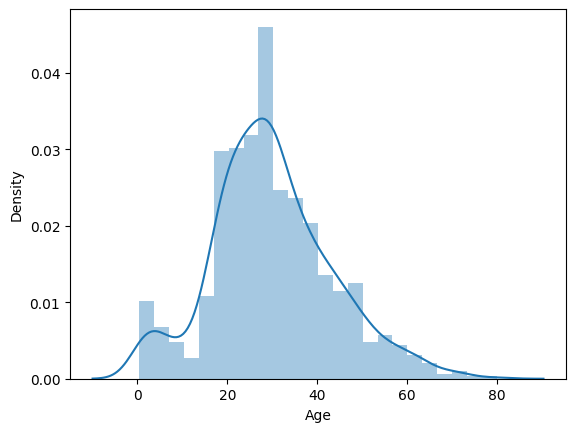

In [26]:
# Plot the distribution of the 'Age' column
dc_age_knn = sns.distplot(train['Age']) # knn imputer

Median: It had the highest density of 0.10 which indicates that too many values are the median age. Median by title: The titles were extracted from the names to fill the median age based on the titles (0.07 highest density).
KNN:The features Pclass, Fare, and Sex were used to impute the age. It had the best distribution of around 0.045 which was much lower than the other methods.

## Imputing Embarkation Point

In [27]:
train[train['Embarked'].isnull()] # Check for null values in the 'Embarked' column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Fare_Bin,Family_Size,Deck,Cabin_Number,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,31-45,51-100,1,B,28,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,61-80,51-100,1,B,28,Mrs


In [28]:
# Calculate the mode of the 'Embarked' column
embarked_mode = train['Embarked'].mode()[0]

# Fill missing values in the 'Embarked' column with the mode
train['Embarked'].fillna(embarked_mode, inplace=True)

In [29]:
# Display rows with index 61 and 829 to check for imputed values
train.loc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin,Fare_Bin,Family_Size,Deck,Cabin_Number,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,31-45,51-100,1,B,28,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,61-80,51-100,1,B,28,Mrs


## Dropping columns

In [30]:
# drop cabin and ticket, age bin_ and fare bins columns
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age_Bin', 'Fare_Bin', 'Deck', 'Cabin_Number', 'Title' ], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


## Data preparation for modelling



In [31]:
# One-Hot Encoding
def one_hot_encode_column(df, column):
    df = pd.get_dummies(df, columns=[column], prefix=column, dtype=int)
    return df

train = one_hot_encode_column(train, 'Sex') # Encode Sex feature
train = one_hot_encode_column(train, 'Embarked') # Encode Embarked feature

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,2,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


In [32]:
# Scale numerical columns
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'Family_Size', 'SibSp', 'Parch']
train[num_cols] = scaler.fit_transform(train[num_cols])

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.589416,0.432793,-0.473674,-0.502445,0.059160,0,1,0,0,1
1,1,1,0.594998,0.432793,-0.473674,0.786845,0.059160,1,0,1,0,0
2,1,3,-0.293312,-0.474545,-0.473674,-0.488854,-0.560975,1,0,0,0,1
3,1,1,0.372920,0.432793,-0.473674,0.420730,0.059160,1,0,0,0,1
4,0,3,0.372920,-0.474545,-0.473674,-0.486337,-0.560975,0,1,0,0,1


In [33]:
# Select Features
feature = train_copy.drop('Survived', axis=1)

# Select Target
target = train_copy['Survived']

# Set Training and Testing Data (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.15,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of test label:', y_test.shape)

Shape of training feature: (757, 16)
Shape of testing feature: (134, 16)
Shape of training label: (757,)
Shape of test label: (134,)
